<a href="https://colab.research.google.com/github/ferrefab/pythonProject/blob/main/ferrefab_galejua_pythonProject_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Einleitung**

Ausgangslage unseres Projektes sind zwei Datensätze mit Daten zu Kaffeeeigenschaften. Der Cotter-Datensatz ist auf der Plattform Dryad verfügbar, welche Datensätze zu einer Vielzahl an wissenschaftlichen Arbeiten zur Verfügung stellt (https://datadryad.org/stash/dataset/doi:10.25338/B8993H#usage). Der Datensatz hält Informationen zu Verkostungen von frisch gebrühtem schwarzen Kaffee inklusive den Einstellungen an der für die Verkostung benutzten Maschine.

Der Arabica-Datensatz stammt von der Github-Seite https://github.com/jldbc/coffee-quality-database. Die dort verfügbaren CSV-Dateien stammen aus Reviews von 1312 Arabica-Kaffeebohnen, welche den Röstprozess noch nicht durchlaufen sind, durchgeführt vom Institut für Kaffeequalität https://www.coffeeinstitute.org/. Gemeinsame Attribute beider Datensätze wie Säure oder Süsse lassen möglicherweise Synergien zu, die für den Ausgang der Predictions unserer Modelle von Bedeutung sein könnten.

Ziel unseres Projektes ist es, Aussagen darüber machen zu können, ob ein Kaffee gut schmeckt aufgrund sensorischer Input-Variablen, um das Kaffeeerlebnis den Präferenzen des Users anzupassen.

In diesem ersten Notebook führen wir eine Explorative Datenanalyse (EDA) durch. Unsere Hauptziele sind es, ein umfassendes Verständnis der Daten zu erlangen, Muster und Zusammenhänge aufzudecken und bedeutungsvolle Gruppen innerhalb der Datensätze zu identifizieren.

Am Ende dieses Notebooks erwarten wir:


*   Die wichtigsten Merkmale der Datensätze zusammzufassen.
*   Beziehungen zwischen zentralen Variablen zu visualisieren.
*   Unsere Hypothesen für dieses Projekt zu testen und Erkenntnisse zu gewinnen, welche die Richtung und den Umfang unseres Projektes bestimmen.

Diese Analyse dient als Grundlage, um ein solides Verständnis der Daten aufzubauen und die nächsten Schritte des Projekts vorzubereiten.
Tauchen wir ein in die Welt des Kaffees!



### Erste Einsicht in die Daten

In [ ]:
# Importieren beider Datensätze:
import requests

def download_file(url, target_path):
  try:
    response = requests.get(url)
    response.raise_for_status()
    with open(target_path, "wb")as f:
      f.write(response.content)
    print(f"Downloaded file {target_path}")
  except requests.exceptions.RequestException as e:
    print(f"Failed to Download {url}. Error: {e}")

files_to_download = [
    ('https://raw.githubusercontent.com/galeajua/coffee-brewer/master/data/arabica_raw.csv', 'arabica_raw.csv'),
    ('https://raw.githubusercontent.com/galeajua/coffee-brewer/master/data/cotter_raw.csv', 'cotter_raw.csv')
]

for url, path in files_to_download:
  download_file(url, path)


Downloaded file arabica_raw.csv
Downloaded file cotter_raw.csv


In [ ]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway


In [ ]:
# CSV in Dataframe einlesen
arabica_data = pd.read_csv('arabica_raw.csv')
cotter_data = pd.read_csv('cotter_raw.csv')

In [ ]:
# Info zu null-Werten und Datentypen
print("Arabica Dataset:\n")
arabica_data.info()
print("\nCotter Dataset:\n")
cotter_data.info()

Arabica Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1312 non-null   int64  
 1   quality_score                     1312 non-null   float64
 2   view_certificate_1                0 non-null      float64
 3   view_certificate_2                0 non-null      float64
 4   Cupping Protocol and Descriptors  0 non-null      float64
 5   View Green Analysis Details       0 non-null      float64
 6   Request a Sample                  0 non-null      float64
 7   Species                           1312 non-null   object 
 8   Owner                             1305 non-null   object 
 9   Country of Origin                 1311 non-null   object 
 10  Farm Name                         956 non-null    object 
 11  Lot Number                        270 non-null    o

In [ ]:
# Grössen beider Datensätze
print(f"The Arabica Dataset has a length of {len(arabica_data)} and a shape of {arabica_data.shape}")
print(f"The Cotter Dataset has a length of {len(cotter_data)} and a shape of {cotter_data.shape}")

The Arabica Dataset has a length of 1312 and a shape of (1312, 53)
The Cotter Dataset has a length of 3186 and a shape of (3186, 48)


In [ ]:
# Einblick in die ersten 5 Zeilen beider Datensätze
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
print("\n")
print("\nArabica Dataset:\n")
print("\n")
arabica_data.head()





Arabica Dataset:





,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner.1,Variety,Status,Processing Method,NA,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,NA.1,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,NA.2,Moisture,Category One Defects,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,0,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,NaN,METAD PLC,2014/2015,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Completed,Washed / Wet,Sample,8.67,8.83,8.67,8.75,8.50,8.42,Sample,10.0,10.0,10.0,8.75,Sample 90.58,NaN,12 %,0 full defects,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
1,1,89.92,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,NaN,METAD PLC,2014/2015,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Completed,Washed / Wet,Sample,8.75,8.67,8.50,8.58,8.42,8.42,Sample,10.0,10.0,10.0,8.58,Sample 89.92,NaN,12 %,0 full defects,0.0,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,2,89.75,NaN,NaN,NaN,NaN,NaN,Arabica,Grounds for Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,Completed,NaN,Sample,8.42,8.50,8.42,8.42,8.33,8.42,Sample,10.0,10.0,10.0,9.25,Sample 89.75,NaN,0 %,0 full defects,0.0,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
3,3,89.00,NaN,NaN,NaN,NaN,NaN,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,NaN,Wolensu,NaN,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Completed,Natural / Dry,Sample,8.17,8.58,8.42,8.42,8.50,8.25,Sample,10.0,10.0,10.0,8.67,Sample 89.00,NaN,11 %,0 full defects,0.0,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
4,4,88.83,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,NaN,METAD PLC,2014/2015,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Completed,Washed / Wet,Sample,8.25,8.50,8.25,8.50,8.42,8.33,Sample,10.0,10.0,10.0,8.58,Sample 88.83,NaN,12 %,0 full defects,0.0,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


In [ ]:
print("\n")
print("\nCotter Dataset:\n")
print("\n")
cotter_data.head()




Cotter Dataset:





,Judge,Cluster,Week,Session Number,Position,Brew,Temp.x,TDS.x,PE.x,Dose,Setting,Grind,Empty Carafe,Full Carafe,Brew Mass,TDS__1,Percent Extraction,pH,Initial NaOH,Final NaOH,Titration pH,Volume,Brew Temperature,Pour Temp,90Sec Temp,Liking,Temp,Flavor.intensity,Acidity,Mouthfeel,Tea.floral,Fruit,Citrus,Green.veg,Paper.wood,Burnt,Cereal,Nutty,Dark.chocolate,Caramel,Bitter,Astringent,Roasted,Sour,Thick.viscous,Sweet,Rubber,Purchase.intent
0,1,1,3,13,3,87-1.0-16,Low,Low,Low,176.1,1SM,5,1769.3,4598.4,2829.1,1.05,16.87,5.05,13.3,18.3,8.20,5.0,81.1,67.0,63.5,6,4,2,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
1,1,1,2,10,2,87-1.0-20,Low,Low,Medium,145.0,6LG,3,1764.3,4670.2,2905.9,0.97,19.44,5.01,14.3,18.8,8.20,4.5,81.0,69.4,63.9,4,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,1,1,3,13,9,87-1.0-24,Low,Low,High,119.0,4LG,3,1791.0,4675.1,2884.1,0.96,23.27,5.11,18.5,22.6,8.20,4.1,78.6,66.3,61.5,2,4,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2
3,1,1,2,10,9,87-1.25-16,Low,Medium,Low,215.3,12LG,5,1775.1,4586.2,2811.1,1.07,13.97,5.08,3.6,8.6,8.20,5.0,80.4,68.9,62.1,7,3,3,4,4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,1,1,3,13,10,87-1.25-20,Low,Medium,Medium,176.1,12LG,3,1782.1,4651.3,2869.2,1.27,20.69,5.02,7.3,13.1,8.21,5.8,80.8,66.9,62.1,8,3,3,3,3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,5



Summary statistics:

       Unnamed: 0  quality_score  view_certificate_1  view_certificate_2  \
count     1312.00        1312.00                 0.0                 0.0   
mean       655.31          82.09                 NaN                 NaN   
std        378.86           3.68                 NaN                 NaN   
min          0.00           0.00                 NaN                 NaN   
25%        327.75          81.17                 NaN                 NaN   
50%        655.50          82.50                 NaN                 NaN   
75%        983.25          83.67                 NaN                 NaN   
max       1310.00          90.58                 NaN                 NaN   

       Cupping Protocol and Descriptors  View Green Analysis Details  \
count                               0.0                          0.0   
mean                                NaN                          NaN   
std                                 NaN                          NaN   
min  

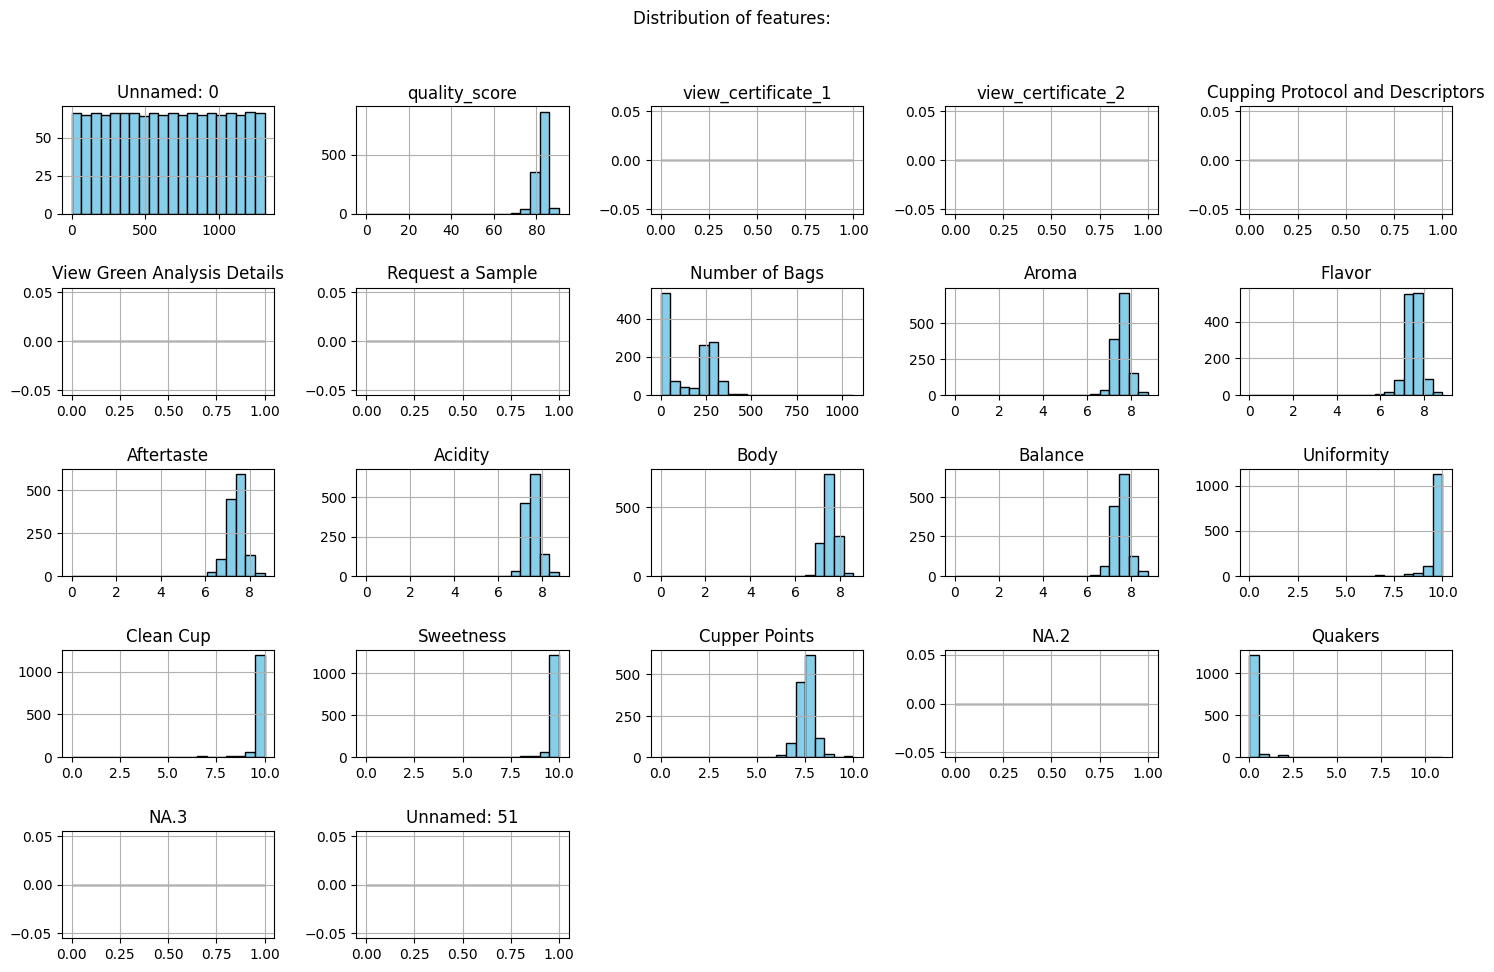

In [ ]:
%matplotlib inline

# Überblick einiger statistischer Kennzahlen und fehlende Werte im Arabica-Datensatz
print("\nSummary statistics:\n")
print(arabica_data.describe())
print("\nMissing values:\n")
print(arabica_data.isnull().sum())

# Verteilung Arabica-Datensatz
arabica_data.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of features:\n")
plt.tight_layout(pad=2.0)
plt.show()

\Summary statistics:

         Judge  Cluster     Week  Session Number  Position     Dose    Grind  \
count  3186.00  3186.00  3186.00         3186.00   3186.00  3186.00  3186.00   
mean     59.50     1.57     2.07            9.69      5.35   180.13     3.74   
std      34.07     0.50     0.81            5.06      2.80    39.23     0.93   
min       1.00     1.00     1.00            1.00      1.00   119.00     3.00   
25%      30.00     1.00     1.00            5.00      3.00   149.00     3.00   
50%      59.50     2.00     2.00           10.00      5.00   176.10     3.00   
75%      89.00     2.00     3.00           14.00      8.00   207.60     5.00   
max     118.00     2.00     3.00           18.00     10.00   265.00     5.00   

       Empty Carafe  Full Carafe  Brew Mass   TDS__1  Percent Extraction  \
count       3186.00      3186.00    3186.00  3186.00             3186.00   
mean        1783.43      4609.91    2826.47     1.27               20.36   
std           12.02        49

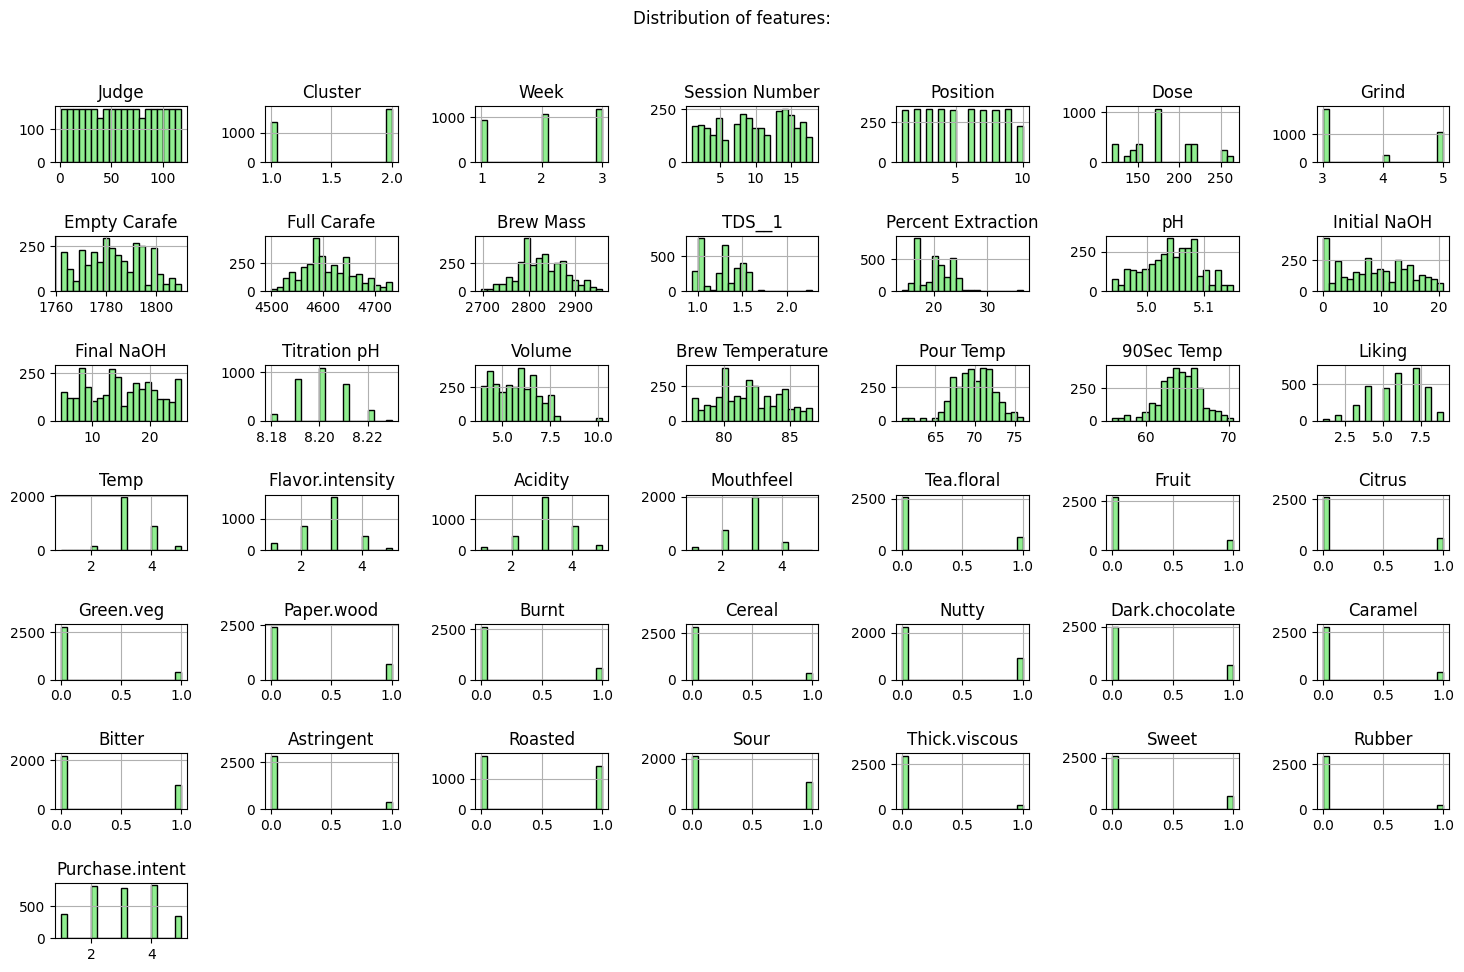

In [ ]:
# Überblick einiger statistischer Kennzahlen und fehlende Werte im Cotter-Datensatz
print("\Summary statistics:\n")
print(cotter_data.describe())
print("\nMissing values:\n")
print(cotter_data.isnull().sum())

# Verteilung Cotter
cotter_data.hist(figsize=(15, 10), bins=20, color='lightgreen', edgecolor='black')
plt.suptitle("Distribution of features:\n")
plt.tight_layout(pad=2.0)
plt.show()

### Erste Bereinigung der Daten

In [ ]:
# Um sinnvolle Hypothesentest oder Heatmaps darstellen zu können, müssen wir den Arabica-Datensatz ein erstes Mal
# bereinigen.

# Verwerfung von Spalten die wir sicher nicht verwenden werden (bspw. aufgrund lauter null-values)
drop_columns_arabica = ['Unnamed: 0', 'view_certificate_1', 'view_certificate_2',
                   'Cupping Protocol and Descriptors', 'View Green Analysis Details',
                   'Request a Sample', 'Lot Number', 'Mill', 'ICO Number',
                   'Number of Bags', 'Bag Weight', 'In-Country Partner',
                   'Status', 'NA', 'NA.1', 'NA.2', 'Category One Defects',
                   'Quakers', 'Category Two Defects', 'NA.3', 'Expiration',
                   'Certification Body', 'Certification Address', 'Certification Contact',
                   'Unnamed: 51', 'Notes', 'Owner', 'Owner.1', 'Region', 'Producer',
                   'Company', 'Farm Name', 'Harvest Year', 'Grading Date']

arabica_data = arabica_data.drop(columns=drop_columns_arabica)

In [ ]:
arabica_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quality_score      1312 non-null   float64
 1   Species            1312 non-null   object 
 2   Country of Origin  1311 non-null   object 
 3   Altitude           1094 non-null   object 
 4   Variety            1110 non-null   object 
 5   Processing Method  1159 non-null   object 
 6   Aroma              1312 non-null   float64
 7   Flavor             1312 non-null   float64
 8   Aftertaste         1312 non-null   float64
 9   Acidity            1312 non-null   float64
 10  Body               1312 non-null   float64
 11  Balance            1312 non-null   float64
 12  Uniformity         1312 non-null   float64
 13  Clean Cup          1312 non-null   float64
 14  Sweetness          1312 non-null   float64
 15  Cupper Points      1312 non-null   float64
 16  Total Cup Points   1312 

In [ ]:
# Da die Anbauhöhe möglicherweise eine wichtige Rolle bei für die Qualität des Kaffees spielt,
# schauen wir uns die Spalte 'Altitude' etwas genauer an:
arabica_data['Altitude'].unique()

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'Meters above sea level: 1.872',
       'Meters above sea level: 1.943', '2000 ft',
       'Meters above sea level: 2.080', '1200-1800m', '1450',
       '1700-2000m', 'Meters above sea level: 2.019', '1300 MSNM', '1320',
       'Meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'Meters above sea level: 1.941',
       '1.2', '1000 M', '1754', '900-1,500m', '1520m-2200m', '1400-1900M',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1,700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900M', '5600-5760 METROS', '1400 M',
       '1700', '1770', '1300 msnm', 'above 1600 M', 'Above 1200 M',
       '1550 msnm', '1550', '1250-1400 meter', '1400 msm', '2.560 msnm',
       '2136 msnm', '1900', '-1', '1580', '1100m', '1400 MASL',
       '3500-5200 feet', 'De 1600 a 1950 msnm', '800 

In [ ]:
# um die Spalte 'Altitude' nutzen zu können, müssen wir die Werte vereinheitlichen. Dazu werden wir jeweils den numerischen Wert extrahieren
# (in Meter) und setzen bei zwei Werten (Ober- und Untergrenze) den Durchschnitt beider Werte
def extract_numeric_values(value):

    if pd.isna(value):
            return None

    value = str(value).replace(',', '').lower()

    numbers = list(map(float, re.findall(r'[-+]?\d*\.\d+|\d+', value)))

    if len(numbers) > 1:
        return np.mean(numbers)

    elif numbers:
        return numbers[0]

    return None


arabica_data['Altitude'] = arabica_data['Altitude'].apply(extract_numeric_values)


In [ ]:
# In den nächsten Schritten:
# 1. Entfernen wir unrealistische Werte (zu hohe oder tiefe m.ü.M-Werte wo Kaffee nicht angebaut wird)
# 2. Konvertieren vermeintliche Kilometer-Werte in Meter
# 3. Handhabung von null-Werten

# Nur Werte zwischen 0 und 3000 werden berücksichtigt
arabica_data['Altitude'].apply(lambda x: np.where((x > 0) & (x <= 3000), x, np.nan))

,Altitude
0,2075.0
1,2075.0
2,1700.0
3,2000.0
4,2075.0
...,...
1307,350.0
1308,1100.0
1309,NaN
1310,NaN


In [ ]:
print(arabica_data['Altitude'].isna().sum())

227


In [ ]:
# In Anbetracht der hohen Anzahl an NaN-Werten für „Altitude“ ersetzen wir, anstatt diese Zeilen wegzulassen und möglicherweise
# wertvolle Informationen zu verlieren, Nan-Werte oder 0-Werte mit dem Durchschnitt von 'Altitude'. Zusätzlich werden alle Werte
# zwischen 0 und 3, die wahrscheinlich in km angegeben sind, durch Multiplikation mit 1000 in Meter umgewandelt.
# Außerdem setzen wir alle Werte zwischen 4 und 300 (wahrscheinlich Anomalien, da Kaffee nicht in so niedrigen Höhen wächst) auf ein Minimum
# von 300 und alle Werte über 3000 (ebenfalls wahrscheinlich Anomalien aus dem gleichen Grund) auf ein Maximum von 3000 Meter:

arabica_data['Altitude'] = arabica_data['Altitude'].apply(
    lambda x: x * 1000 if 0 <= x <= 3 else
              300 if 4 <= x <= 300 else
              3000 if x > 3000 else
              x
)
arabica_data['Altitude'] = arabica_data['Altitude'].replace(0, np.nan)  # Falls noch verbleibende 0-Werte existieren, ersetze mit NaN
arabica_data['Altitude'] = arabica_data['Altitude'].fillna(arabica_data['Altitude'].mean())  # Alle Nan-Werte mit dem Durchschnitt ersetzen

In [ ]:
arabica_data['Altitude'].describe()

,Altitude
count,1312.00
mean,1510.39
std,576.88
min,300.00
25%,1200.00
50%,1510.39
75%,1650.00
max,3000.00


In [ ]:
# Umbenennung einiger Spalten
arabica_data.rename(columns={'Altitude': 'altitude_meters',
                             'quality_score': 'score',
                             'Moisture': 'moisture_percent'}, inplace=True)

In [ ]:
# handhabung der Spalten 'Total Cup Points' und 'Moisture':
# Extrahierung der Dezimalzahlen in 'Total Cup Points'
arabica_data['Total Cup Points'] = arabica_data['Total Cup Points'].str.extract(r'(\d+\.\d+)')

# Verwandle bspw. den Wert '12 %' zu 0.12
arabica_data['moisture_percent'] = arabica_data['moisture_percent'].str.replace('%', '').astype(float) / 100

In [ ]:
arabica_data.head()

,score,Species,Country of Origin,altitude_meters,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,moisture_percent,Color
0,90.58,Arabica,Ethiopia,2075.0,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,Green
1,89.92,Arabica,Ethiopia,2075.0,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,Green
2,89.75,Arabica,Guatemala,1700.0,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,NaN
3,89.00,Arabica,Ethiopia,2000.0,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,Green
4,88.83,Arabica,Ethiopia,2075.0,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,Green


Nun da wir den Arabica-Datensatz etwas bereinigt haben um mit ihm arbeiten zu können, schauen wir uns nun den Cotter-Datensatz an

In [ ]:
# der Cotter-Datensatz braucht weniger initiale Bereinigung als der Arabica-Datensatz

# Verwerfung von Spalten die wir sicher nicht verwenden werden (aufgrund irrelevanter Spalten und dessen, dass wir uns möglichst auf
# Attribute konzentrieren möchten, die bekanntlich zum Genuss von Kaffee beitragen, in diesem Fall 'Liking')
drop_columns_cotter = ['Judge', 'Cluster', 'Week', 'Session Number', 'Position',
                          'Empty Carafe', 'Full Carafe', 'Initial NaOH', 'Final NaOH',
                          'Titration pH', 'Volume', 'Pour Temp',
                          '90Sec Temp', 'Purchase.intent', 'Temp.x', 'TDS.x', 'PE.x']

cotter_data = cotter_data.drop(columns=drop_columns_cotter)

In [ ]:
cotter_data['Brew'].head()

,Brew
0,87-1.0-16
1,87-1.0-20
2,87-1.0-24
3,87-1.25-16
4,87-1.25-20


In [ ]:
# Die Spalte 'Brew' hält Daten zu den Zielen bezüglich Brühtemperatur (Temperatur, in Grad Celsius, des frisch gebrühten Kaffees in der Karaffe gleich nach dem Brühvorgang),
# der gesamten gelösten Feststoffe (lösliche Komponenten des Kaffees, in %, die sich effektiv aufgelöst haben und in der Karaffe gelandet sind) sowie
# Extraktion (in %, Menge der gemahlenen Kaffeebohnen die effektiv in der Karaffe landen). Wir extrahieren die numerischen Werte der 'Brew'-Spalte und kreieren neue Spalten daraus:
cotter_data[['target_brew_temperature', 'target_total_dissolved_solids_percent', 'target_extraction_percent']] = cotter_data['Brew'].str.extract(r"(\d+)\s*-\s*(\d+\.\d+)\s*-\s*(\d+)")

# Wir weisen den extrahierten Spalten passende Datentypen zu
cotter_data['target_brew_temperature'] = cotter_data['target_brew_temperature'].astype('int16')
cotter_data['target_total_dissolved_solids_percent'] = cotter_data['target_total_dissolved_solids_percent'].astype('float32')
cotter_data['target_extraction_percent'] = cotter_data['target_extraction_percent'].astype('int16')
cotter_data.drop(columns=['Brew'], inplace=True)
cotter_data.describe()

,Dose,Grind,Brew Mass,TDS__1,Percent Extraction,pH,Brew Temperature,Liking,Temp,Flavor.intensity,Acidity,Mouthfeel,Tea.floral,Fruit,Citrus,Green.veg,Paper.wood,Burnt,Cereal,Nutty,Dark.chocolate,Caramel,Bitter,Astringent,Roasted,Sour,Thick.viscous,Sweet,Rubber,target_brew_temperature,target_total_dissolved_solids_percent,target_extraction_percent
count,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.0,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00
mean,180.13,3.74,2826.47,1.27,20.36,5.04,81.92,5.85,3.33,2.80,3.14,2.81,0.2,0.16,0.18,0.13,0.23,0.18,0.11,0.29,0.21,0.13,0.31,0.11,0.45,0.34,0.08,0.19,0.07,90.00,1.25,20.00
std,39.23,0.93,50.69,0.23,3.24,0.04,2.31,1.74,0.67,0.84,0.83,0.69,0.4,0.36,0.39,0.34,0.42,0.38,0.31,0.46,0.41,0.34,0.46,0.32,0.50,0.47,0.27,0.39,0.26,2.45,0.20,3.27
min,119.00,3.00,2697.00,0.93,13.97,4.94,77.60,1.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,87.00,1.00,16.00
25%,149.00,3.00,2790.80,1.03,17.03,5.01,80.20,5.00,3.00,2.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,87.00,1.00,16.00
50%,176.10,3.00,2821.20,1.29,20.60,5.04,81.90,6.00,3.00,3.00,3.00,3.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,1.25,20.00
75%,207.60,5.00,2862.80,1.47,23.09,5.08,83.80,7.00,4.00,3.00,4.00,3.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,93.00,1.50,24.00
max,265.00,5.00,2958.20,2.29,36.64,5.15,86.70,9.00,5.00,5.00,5.00,5.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,93.00,1.50,24.00


In [ ]:
# Wir geben den Spalten zutreffendere Namen
cotter_data.rename(columns={'Brew Mass': 'brew_mass_grams',
                            'TDS__1': 'total_dissolved_solids_percent',
                            'Percent Extraction': 'extraction_percent'}, inplace=True)



In [ ]:
cotter_data.head()

,Dose,Setting,Grind,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,pH,Brew Temperature,Liking,Temp,Flavor.intensity,Acidity,Mouthfeel,Tea.floral,Fruit,Citrus,Green.veg,Paper.wood,Burnt,Cereal,Nutty,Dark.chocolate,Caramel,Bitter,Astringent,Roasted,Sour,Thick.viscous,Sweet,Rubber,target_brew_temperature,target_total_dissolved_solids_percent,target_extraction_percent
0,176.1,1SM,5,2829.1,1.05,16.87,5.05,81.1,6,4,2,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,87,1.00,16
1,145.0,6LG,3,2905.9,0.97,19.44,5.01,81.0,4,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,87,1.00,20
2,119.0,4LG,3,2884.1,0.96,23.27,5.11,78.6,2,4,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,87,1.00,24
3,215.3,12LG,5,2811.1,1.07,13.97,5.08,80.4,7,3,3,4,4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,87,1.25,16
4,176.1,12LG,3,2869.2,1.27,20.69,5.02,80.8,8,3,3,3,3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,87,1.25,20


---



---------------     Nun können wir etwas aussagekräftigere Graphen darstellen und Hypothesentests machen.    ---------------



---



### Erste Plots

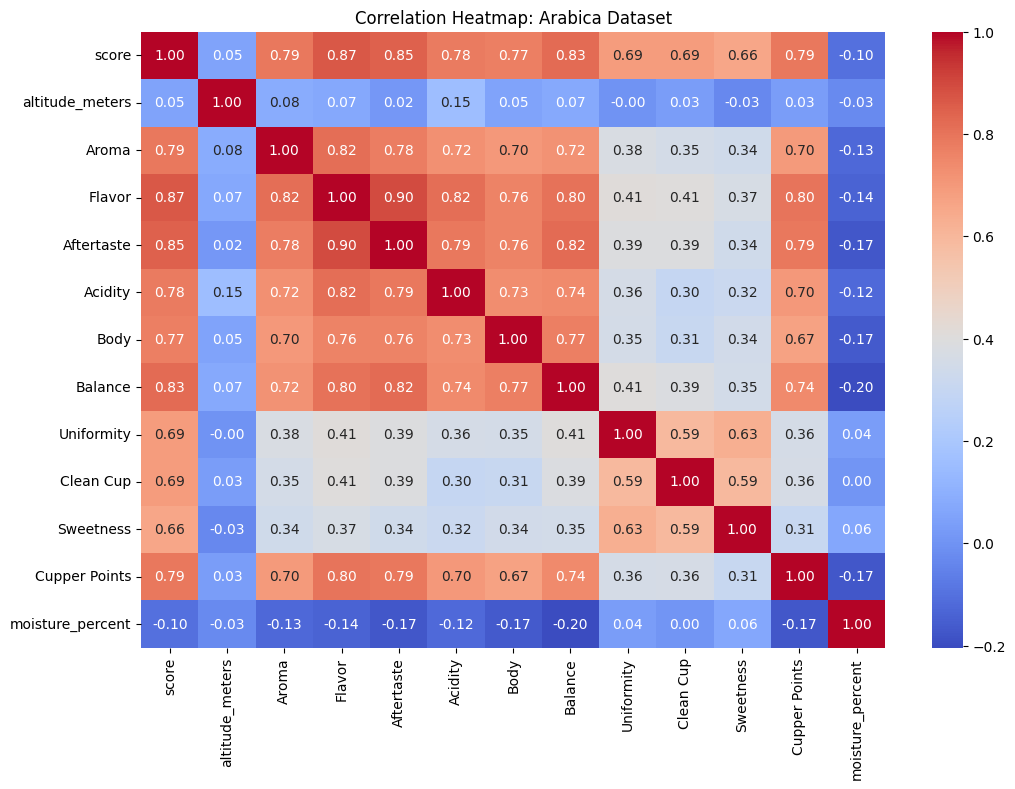

In [ ]:
# Um einen ersten Einblick in Beziehungen zwischen Variablen zu erhalten und unter der Annahme möglicher linearer Beziehungen
# zwischen Variablen 'Aroma' und 'score' oder 'Aftertaste' und 'score', wenden wir die Pearson Correlation-Methode und erstellen einen entsprechenden Heatmap:
plt.figure(figsize=(12, 8))
numeric_columns_arabica = arabica_data.select_dtypes(include=['number'])
sns.heatmap(numeric_columns_arabica.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Arabica Dataset")
plt.show()

----

Tatsächlich geht aus dem oberen Heatmap hervor, dass folgende sensorische Attribute eine hohe positive Korrelation mit 'score' haben, unserer möglichen Target-Variable:
* 'Flavor' (0.87)
* 'Aftertaste' (0.85)
* 'Balance' (0.83)
* 'Aroma' (0.79)

'Acidity' (0.78) und 'Body' (0.77) haben ebenfalls eine relativ hohe Korrelationen mit 'score', weswegen wir diese Variablen im Falle einer linearen Regression wahrscheinlich ebenfalls berücksichtigen würden.

Da 'Flavor' und 'Aftertaste' auf Multikolinearität hindeuten und auch ähnliche Kaffee-Komponenten beschreiben (Korrelation von 0.90), könnten wir theoretisch auf eine der beiden Variablen verzichten, um möglicherweise künftige Modelle nicht zu verfälschen. Ebenso deuten 'Flavor' und 'Balance' auf Multikolinearität hin (Korrelation von 0.80). Zunächst wollen wir aber auf keine der Variablen verzichten, da diese bekanntlich zum gesamten Kaffeeerlebnis beitragen und um möglicherweise wertvolle Informationen zu behalten.

---

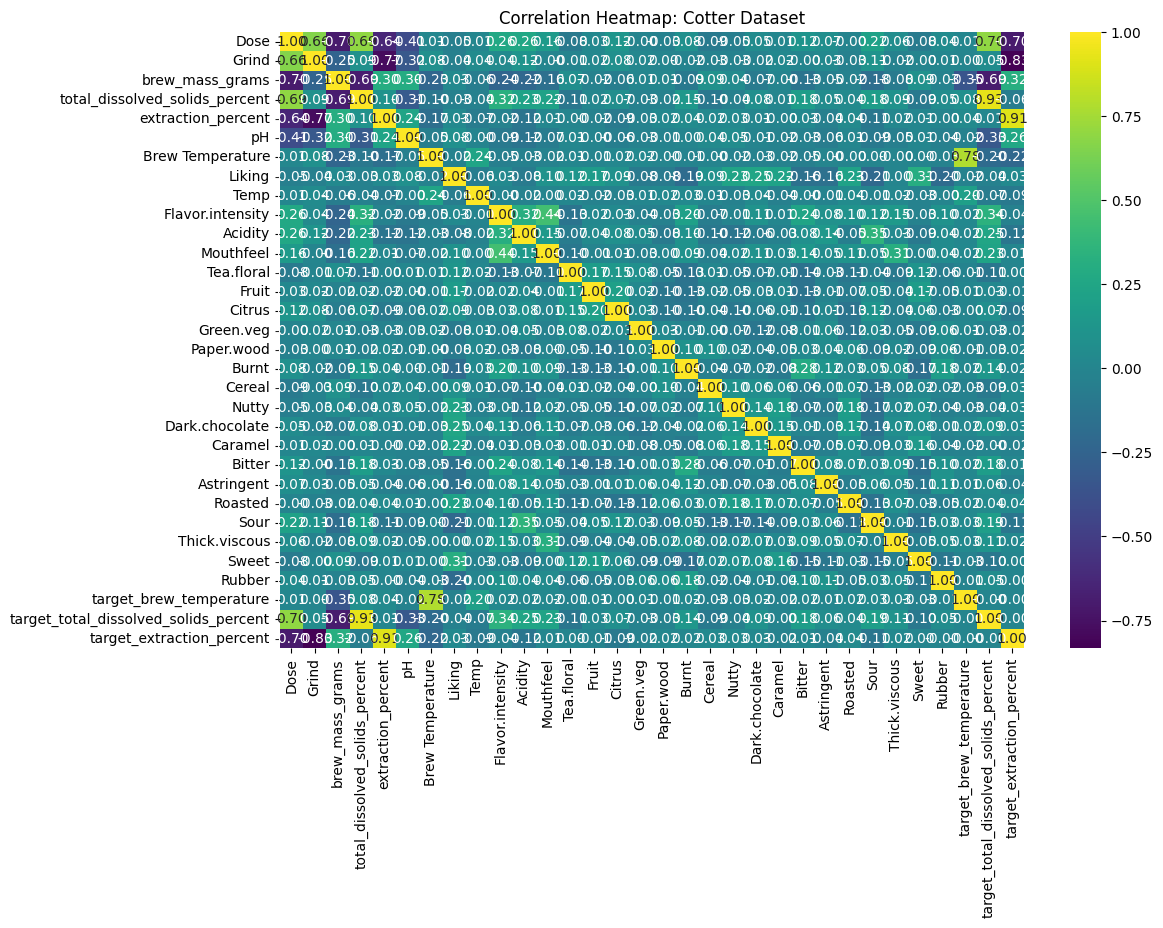

In [ ]:
# Nun wenden wir auch die Pearson Correlation-Methode beim Cotter-Datensatz an, unter ähnlichen Annahmen wie beim Arabica-Datensatz.
# Bspw. könnte ein Anstieg in 'Flavor.Intensity' auch ein Anstieg in 'Liking' bedeuten.
plt.figure(figsize=(12, 8))
numeric_columns_cotter = cotter_data.select_dtypes(include=['number'])
sns.heatmap(numeric_columns_cotter.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap: Cotter Dataset")
plt.show()

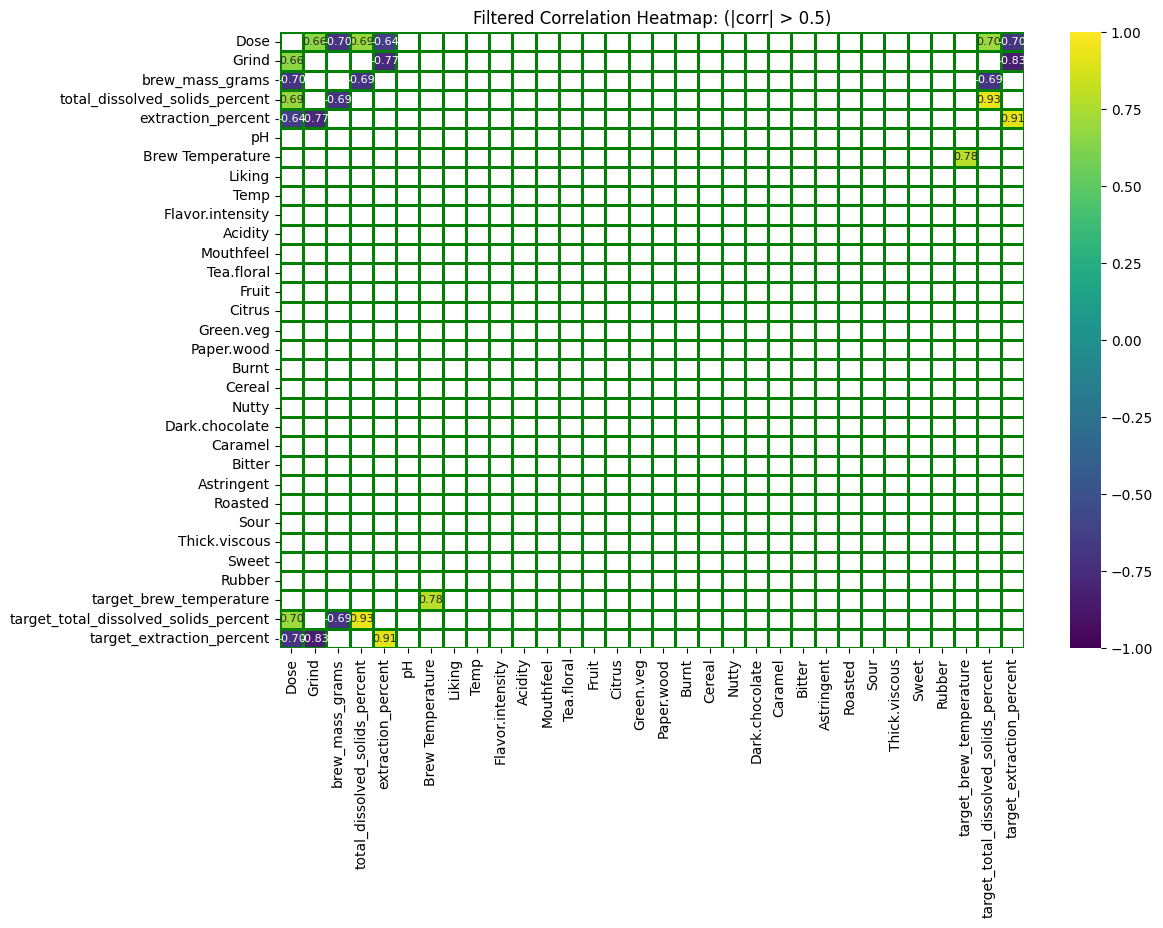

In [ ]:
# Da der Cotter-Datensatz so groß ist und eine vollständige Korrelationsmatrix nicht vollständig lesbar ist, filtern wir nach signifikanteren Korrelationen:
corr_matrix_cotter = cotter_data.select_dtypes(include=['number']).corr()

# Nach Korrelationen mit einem absoluten Wert von > 0.5 filtern:
filtered_corr = corr_matrix_cotter[(corr_matrix_cotter.abs() > 0.5) & (corr_matrix_cotter != 1.0)]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr,
            annot=True,
            cmap='viridis',
            fmt=".2f",
            mask=filtered_corr.isnull(),
            linewidths=1,
            linecolor='green',
            vmin=-1,
            vmax=1,
            annot_kws={"size": 8})
plt.title("Filtered Correlation Heatmap: (|corr| > 0.5)")
plt.show()


---

Hier sehen wir, dass es weit weniger lineare Beziehungen gibt, als beim Arabica-Datensatz. Insbesondere scheint keine
 der Variablen besonders stark mit 'Liking' zu korrelieren.
Aufgrund von allgemein bekanntem Wissen, und aufgrund dessen, dass nicht-lineare Beziehungen zwischen den Variablen existieren können,
werden wir uns auf sensorische Attribute wie 'Mouthfeel', 'Acidity' oder 'Flavor.Intensity' stützen, auch wenn diese gemäss vorliegendem
 Datensatz nicht mit dem allgemeinen Kaffeeerlebnis (linear) korrelieren.

---

                              average_score  entry_count
Country of Origin                                       
United States                         85.98            8
Papua New Guinea                      85.75            1
Japan                                 84.67            1
Ethiopia                              84.54           45
Kenya                                 84.31           25
Uganda                                84.05           26
Ecuador                               83.83            1
Panama                                83.71            4
Colombia                              83.11          183
El Salvador                           83.05           21
China                                 82.93           16
Rwanda                                82.83            1
Costa Rica                            82.79           51
Thailand                              82.57           32
Indonesia                             82.57           20
Peru                           

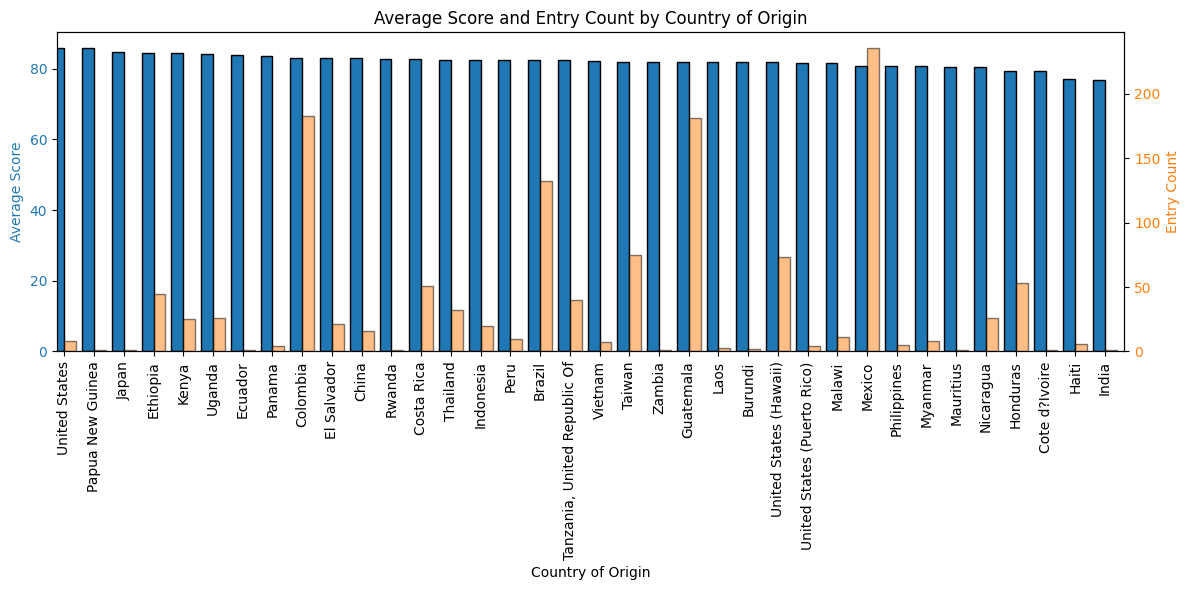

In [ ]:
# Im folgenden veranschaulichen wir, pro Herkunftsland, den Durchschnittswert sowie die Anzahl der Bewertungen:
country_groups = arabica_data.groupby('Country of Origin').agg(
    average_score=('score', 'mean'),
    entry_count=('score', 'count')
).sort_values(by='average_score', ascending=False)

print(country_groups)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotten der Durchschnittswerte:
color = 'tab:blue'
ax1.set_title("Average Score and Entry Count by Country of Origin")
ax1.set_xlabel("Country of Origin")
ax1.set_ylabel("Average Score", color=color)
country_groups['average_score'].plot(kind='bar', ax=ax1, color=color, edgecolor='black', position=1, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

# Darstellen der Anzahl Einträge pro Land:
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Entry Count", color=color)
country_groups['entry_count'].plot(kind='bar', ax=ax2, color=color, edgecolor='black', position=0, width=0.4, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---

Hier sehen wir die Verteilung der durchschnittlichen 'score'-Werte pro Land ebenso wie die jeweilige Anzahl an verfügbaren Datenpunkten.
Da wir uns mehr auf sensorische Attribute konzentrieren möchten, weil diese bekanntlich direkt den Geschmack des Kaffees beeinflussen,
 ist die Berücksichtigung des jeweiligen Landes eher weniger von Bedeutung.

---

### Hypothesentests

In diesem Abschnitt führen wir statistische Tests durch, um spezifische Hypothesen zu prüfen, die im Kontext unseres Projektes relevant sind. Ziel ist es, die entscheidenden Faktoren zu identifizieren, die den Geschmack und die Qualität von Kaffee beeinflussen, um darauf basierend Empfehlungen ableiten zu können.

Hypothesen:

1.   Untersuchen der Korrelation zwischen sensorischen Attributen und dem Gesamtscore mittels Korrelationsanalyse. (Arabica & Cotter Dataset)

      Ziel: Verstehen, welche sensorischen Attribute den Gesamtscore dominieren. Dies hilft uns zu erkennen, welche Eigenschaften gezielt verbessert werden können, um die wahrgenommene Qualität zu steigern.


2.   Vergleich von Kaffeebewertungen nach Anbauhöhe mithilfe eines T-Tests. (Arabica Dataset)

      Ziel: Erforschen des Einflusses von Anbauhöhe. Da höhere Höhen mit besserem Kaffee assoziiert werden können, prüfen wir, ob dies auch für die vorliegenden Daten gilt.


3.   Analyse des Einflusses von Verarbeitungsmethoden auf den Score (Arabica Dataset)

      Ziel: Bewertung der Verarbeitungsmethode. Die Art der Verarbeitung (z.B.gewaschen, trocken) könnte geschmackliche Unterschiede erzeugen, welche die Qualität beeinflussen.


4.   Analyse des Einflusses von Temperatur auf den Score (Cotter Dataset)
      Ziel: Analyse von Kaffeesorten. Unterschiedliche Sorten könnten systematisch unterschiedliche Qualitätsstufen aufweisen.







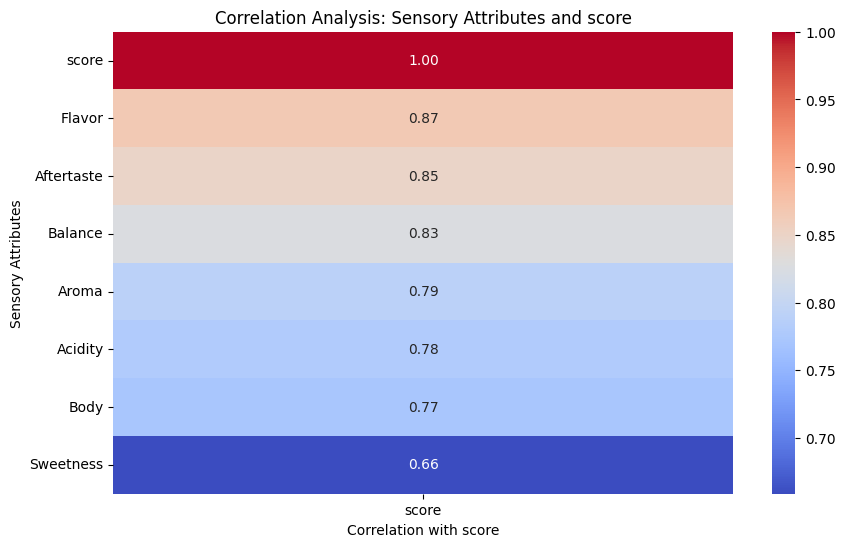

In [ ]:
# Hypothese 1
# Sensorische Attribute beeinflussen den Gesamtscore signifikant
# Arabica-Datensatz:
sensory_features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Sweetness']
correlations = arabica_data[sensory_features + ['score']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlations[['score']].sort_values(by='score', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Analysis: Sensory Attributes and score")
plt.ylabel("Sensory Attributes")
plt.xlabel("Correlation with score")
plt.show()

# Wie bereits oben erwähnt, bestehen folgende Korrelationen sensorischer Attribute mit 'score':


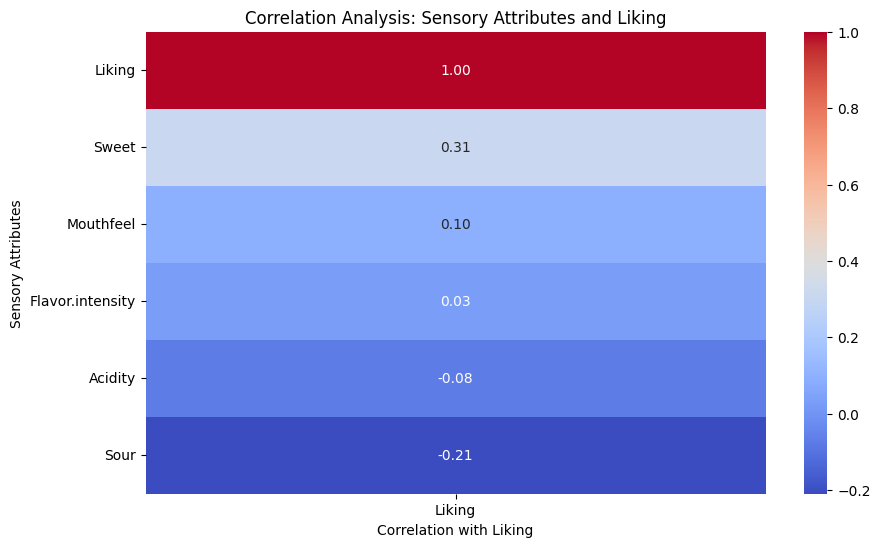

In [ ]:
# Cotter-Datensatz:
sensory_features_cotter = ['Flavor.intensity', 'Acidity', 'Mouthfeel', 'Sweet', 'Sour']
correlations_cotter = cotter_data[sensory_features_cotter + ['Liking']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlations_cotter[['Liking']].sort_values(by='Liking', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Analysis: Sensory Attributes and Liking")
plt.ylabel("Sensory Attributes")
plt.xlabel("Correlation with Liking")
plt.show()

# Auch hier sehen wir wieder, wie oben bereits erwähnt, dass zumindest keine starken linearen Korrelationen zwischen sensorischen Attributen
# und 'Liking' bestehen. Da diese bekanntlich jedoch massgeblich zum Geschmack des Kaffees beitragen, werden wir sie weiterhin beibehalten.

In [ ]:
# Hypothese 2
# Höhere Anbauhöhen sind mit besseren Kaffeebewertungen verbunden
arabica_data['altitude_group'] = pd.cut(
    arabica_data['altitude_meters'], bins=[0, 1200, 1600, 2000, 3000], labels=['Low', 'Medium', 'High', 'Very High']
)

high_altitude_scores = arabica_data[arabica_data['altitude_group'].isin(['High', 'Very High'])]['score'].dropna()
low_altitude_scores = arabica_data[arabica_data['altitude_group'] == 'Low']['score'].dropna()

t_stat, p_value = ttest_ind(high_altitude_scores, low_altitude_scores)
print(f"T-Test: t-Statistics = {t_stat}, p-value = {p_value}")


T-Test: t-Statistics = 6.388609376759816, p-value = 3.003979464376718e-10


In [ ]:
arabica_data['altitude_group'].head()

,altitude_group
0,Very High
1,Very High
2,High
3,High
4,Very High


T-Test Schlussfolgerung:

*   Es gibt einen signifikanten Unterschied in den Scores zwsichen Kaffee aus niedrigen und hohen Anbauhöhen
*   Kaffee aus höheren Anbauhöhen erzielt im Durchschnitt höhere Qualitätsbewertungen!





Variance analysis: F-Statistics = 2.4526136125942086, p-value = 0.04434819999324297


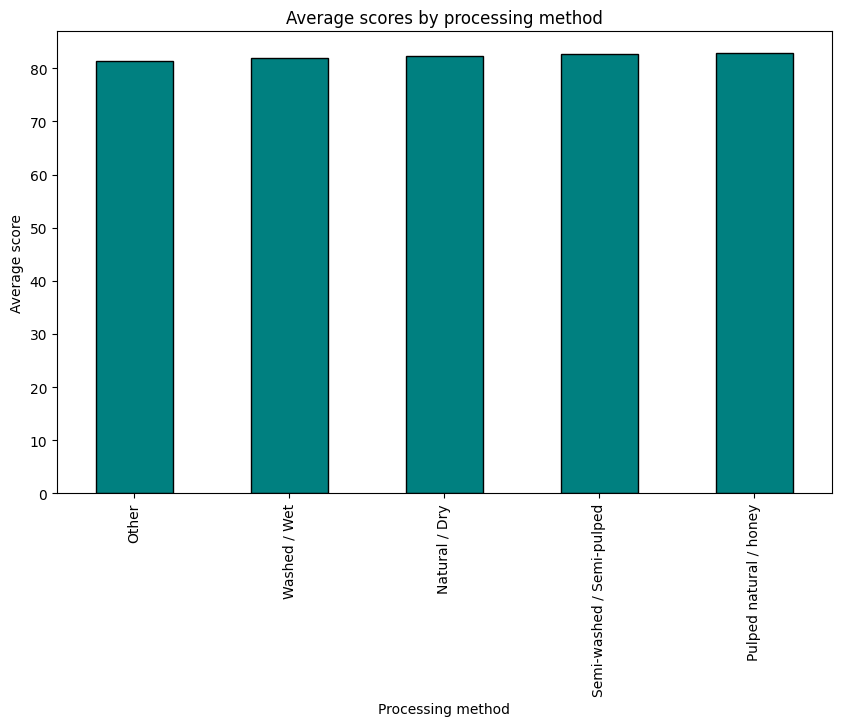

In [ ]:
# Hypothese 3
# Die Verarbeitungsmethode beeinflusst Geschmack und Score
# Varianzanalyse Arabica-Datensatz
processing_groups = arabica_data.groupby('Processing Method')['score'].apply(list).dropna()

f_stat, p_value = f_oneway(*processing_groups)
print(f"Variance analysis: F-Statistics = {f_stat}, p-value = {p_value}")

# Durchschnittsscore pro Verarbeitungsmethode visualisieren
processing_means = arabica_data.groupby('Processing Method')['score'].mean().sort_values()
plt.figure(figsize=(10, 6))
processing_means.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Average scores by processing method")
plt.ylabel("Average score")
plt.xlabel("Processing method")
plt.show()


Hypothese 3 Schlussfolgerung:


*   Die Verarbeitungsmethode beeinflusst die Kaffeescores nicht signifikant!



Variance analysis: F-Statistics = 15.012532789302004, p-value = 3.678641184349884e-12


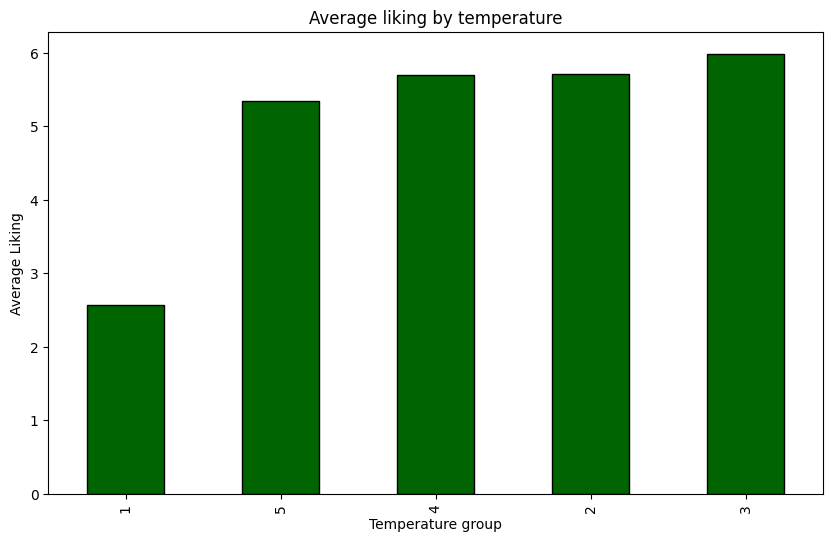

In [ ]:
# Hypothese 4
# Die Temperatur des Kaffees ist direkt mit den Liking-Bewertungen verbunden
# Varianzanalyse Cotter-Datensatz
temp_groups = cotter_data.groupby('Temp')['Liking'].apply(list).dropna()

f_stat, p_value = f_oneway(*temp_groups)
print(f"Variance analysis: F-Statistics = {f_stat}, p-value = {p_value}")

# Durchschnittliches Liking pro Temperatur visualisieren
temp_means = cotter_data.groupby('Temp')['Liking'].mean().sort_values()
plt.figure(figsize=(10, 6))
temp_means.plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title("Average liking by temperature")
plt.ylabel("Average Liking")
plt.xlabel("Temperature group")
plt.show()



Hypothese 4 Schlussfolgerung:



*   die Temperatur des gebrauten Kaffees hat einen signifikanten Einfluss auf die Liking-Bewertung



In [ ]:
# Speichern des bereinigten Arabica- und Cotter-Datensatzes
try:
    arabica_target_path = 'arabica_clean.csv'
    cotter_target_path = 'cotter_clean.csv'
    arabica_data.to_csv(arabica_target_path, index=False)
    cotter_data.to_csv(cotter_target_path, index=False)
    print(f"Wrote file to memory: {arabica_target_path}, {cotter_target_path}")
except Exception as e:
    print(f"Failed to save the DataFrame. Error: {e}")

Wrote file to disk: arabica_clean.csv, cotter_clean.csv
